***Transfer Learn Colab***

---

# Retraining on Diamond dataset
Retraining one of Google's CNN image classification models to new categories using Transfer Learning. This can be an much faster (in a few minutes) than training from scratch (Inception V3 took Google, 2 weeks).



---

[Colab link](https://colab.research.google.com/drive/1xLhvYFC80dDt4wnc6rd0yjEAAQNPjZUv#scrollTo=ajzY4-wqYXT-)

In [1]:
!curl -LO http://download.tensorflow.org/example_images/flower_photos.tgz
!tar xzf flower_photos.tgz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  218M  100  218M    0     0   109M      0  0:00:02  0:00:02 --:--:-- 85.0M


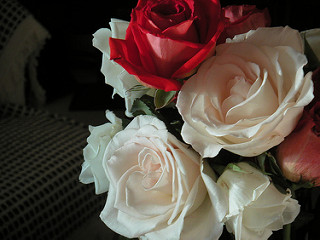

In [2]:
from IPython.display import Image
Image(filename='flower_photos/roses/102501987_3cdb8e5394_n.jpg') 

In [3]:
!curl -LO https://github.com/tensorflow/hub/raw/master/examples/image_retraining/retrain.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   158  100   158    0     0    158      0  0:00:01 --:--:--  0:00:01   827
100 54688  100 54688    0     0  54688      0  0:00:01 --:--:--  0:00:01 54688


In [4]:
!ls flower_photos/* | wc -l
!rm flower_photos/*/[3-9]*
!rm flower_photos/daisy/ flower_photos/dandelion/ flower_photos/tulips/ -r
!ls flower_photos/* | wc -l

3681
591


In [0]:
!python retrain.py --image_dir ./flower_photos --how_many_training_steps 50

In [6]:
!curl -LO https://github.com/tensorflow/tensorflow/raw/master/tensorflow/examples/label_image/label_image.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   175  100   175    0     0    175      0  0:00:01 --:--:--  0:00:01   951
100  4707  100  4707    0     0   4707      0  0:00:01 --:--:--  0:00:01  4707


In [0]:
!python label_image.py \
--graph=/tmp/output_graph.pb --labels=/tmp/output_labels.txt \
--input_layer=Placeholder \
--output_layer=final_result \
--image=bee.jpg \
| grep 'roses\|sunflowers'

# upload diamond dataset
steps 
1. unzip 
2. make directory

In [0]:
!unzip all_diamond.zip
!unzip all_gold.zip
!mkdir images
!mv all_gold images
!mv all_diamond images

# Retraining  model diamond images 

In [9]:
!python retrain.py --image_dir ./images --how_many_training_steps 50

INFO:tensorflow:Looking for images in 'all_diamond'
INFO:tensorflow:Looking for images in 'all_gold'
INFO:tensorflow:Using /tmp/tfhub_modules to cache modules.
2018-10-07 06:26:04.988216: W tensorflow/core/graph/graph_constructor.cc:1263] Importing a graph with a lower producer version 26 into an existing graph with producer version 27. Shape inference will have run different parts of the graph with different producer versions.
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
2018-10-07 06:26:10.655220: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:964] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2018-10-07 06:26:10.655713: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1411] Found device 0 with properties: 
name: Tesla K80 major: 3 minor: 7 memoryClockRate(GHz): 0.8235
pciBusID: 0000:00:04.0
totalMemory: 11.17GiB freeMemory: 11.10GiB
2018-10-07 0

# Using retrained model

In [10]:
!python label_image_modified.py \
--graph=/tmp/output_graph.pb --labels=/tmp/output_labels.txt \
--input_layer=Placeholder \
--output_layer=final_result \
--image=testdiamond1.jpg \
| grep 'all_diamond\|all_gold'

2018-10-07 06:27:19.702233: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:964] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2018-10-07 06:27:19.702725: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1411] Found device 0 with properties: 
name: Tesla K80 major: 3 minor: 7 memoryClockRate(GHz): 0.8235
pciBusID: 0000:00:04.0
totalMemory: 11.17GiB freeMemory: 11.10GiB
2018-10-07 06:27:19.702768: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1490] Adding visible gpu devices: 0
2018-10-07 06:27:19.984225: I tensorflow/core/common_runtime/gpu/gpu_device.cc:971] Device interconnect StreamExecutor with strength 1 edge matrix:
2018-10-07 06:27:19.984299: I tensorflow/core/common_runtime/gpu/gpu_device.cc:977]      0 
2018-10-07 06:27:19.984330: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990] 0:   N 
2018-10-07 06:27:19.984629: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:

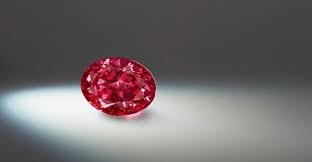

In [11]:
from IPython.display import Image
Image('testdiamond1.jpg')

In [15]:
!python label_image_modified.py \
--graph=/tmp/output_graph.pb --labels=/tmp/output_labels.txt \
--input_layer=Placeholder \
--output_layer=final_result \
--image=testgold1.jpg \
| grep 'all_diamond\|all_gold'

2018-10-07 07:03:21.151148: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:964] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2018-10-07 07:03:21.151638: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1411] Found device 0 with properties: 
name: Tesla K80 major: 3 minor: 7 memoryClockRate(GHz): 0.8235
pciBusID: 0000:00:04.0
totalMemory: 11.17GiB freeMemory: 11.10GiB
2018-10-07 07:03:21.151701: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1490] Adding visible gpu devices: 0
2018-10-07 07:03:21.430609: I tensorflow/core/common_runtime/gpu/gpu_device.cc:971] Device interconnect StreamExecutor with strength 1 edge matrix:
2018-10-07 07:03:21.430729: I tensorflow/core/common_runtime/gpu/gpu_device.cc:977]      0 
2018-10-07 07:03:21.430775: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990] 0:   N 
2018-10-07 07:03:21.431066: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:

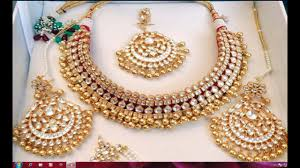

In [18]:
from IPython.display import Image
Image('testgold1.jpg')

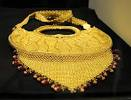

In [16]:
from IPython.display import Image
Image('3.jpg')

In [14]:
!python label_image_modified.py \
--graph=/tmp/output_graph.pb --labels=/tmp/output_labels.txt \
--input_layer=Placeholder \
--output_layer=final_result \
--image=3.jpg \
| grep 'all_diamond\|all_gold'

2018-10-07 07:02:39.347088: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:964] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2018-10-07 07:02:39.347565: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1411] Found device 0 with properties: 
name: Tesla K80 major: 3 minor: 7 memoryClockRate(GHz): 0.8235
pciBusID: 0000:00:04.0
totalMemory: 11.17GiB freeMemory: 11.10GiB
2018-10-07 07:02:39.347609: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1490] Adding visible gpu devices: 0
2018-10-07 07:02:39.624949: I tensorflow/core/common_runtime/gpu/gpu_device.cc:971] Device interconnect StreamExecutor with strength 1 edge matrix:
2018-10-07 07:02:39.625032: I tensorflow/core/common_runtime/gpu/gpu_device.cc:977]      0 
2018-10-07 07:02:39.625056: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990] 0:   N 
2018-10-07 07:02:39.625355: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc: